Project 3 : Regression Problem 1

In this problem, the task is to predict the current health (as given by the target variable) of an organism
given the measurements from two biological sensors measuring their bio-markers (negative indicates
that it is lesser than the average case). With this data, you are expected to try our linear regression
models on the training data and report the following metrics on the test split: (a) Mean Squared Error,
(b) Mean Absolute Error.

Dataset: In Folder Shared look for file p1-train.csv to train the model and p1-test.csv to test the
model. Last column is the target value.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [2]:
# Linear Regression
# Load training and testing datasets
columns = ['Feature1', 'Feature2', 'Target_Variable']
train_data = pd.read_csv('p1_train.csv', names=columns)
test_data = pd.read_csv('p1_test.csv', names=columns)

# Separate features and target variable
X_train = train_data.iloc[:, :-1]  # Features
y_train = train_data.iloc[:, -1]   # Target variable

X_test = test_data.iloc[:, :-1]    
y_test = test_data.iloc[:, -1]  

# Data Preprocessing
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# (MSE) and(MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("LR Mean Squared Error (MSE):", mse)
print("LR Mean Absolute Error (MAE):", mae)

LR Mean Squared Error (MSE): 5.046436003951253
LR Mean Absolute Error (MAE): 1.7990800530982611


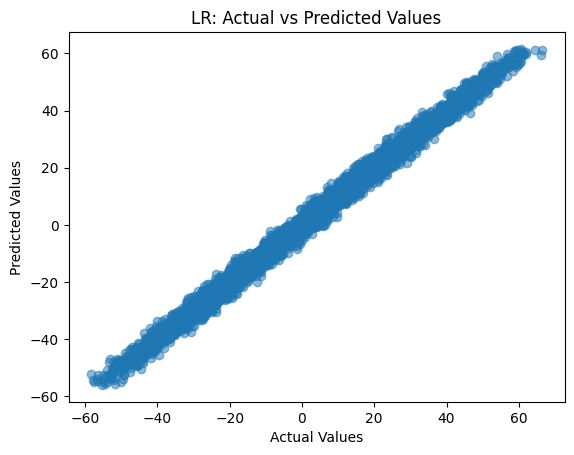

In [3]:

# Scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LR: Actual vs Predicted Values')
plt.show()


In [4]:

# Support Vector Regression (SVR)
# Load the training and testing datasets
columns = ['Feature1', 'Feature2', 'Target_Variable']
train_data = pd.read_csv('p1_train.csv', names=columns)
test_data = pd.read_csv('p1_test.csv', names=columns)

# Separate features and target variable
X_train = train_data.iloc[:, :-1]  # Features
y_train = train_data.iloc[:, -1]   # Target variable

X_test = test_data.iloc[:, :-1]    
y_test = test_data.iloc[:, -1]     

# Data Preprocessing
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize SVR
svr = SVR()

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from GridSearchCV
best_svr = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svr.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("SVR Mean Squared Error (MSE):", mse)
print("SVR Mean Absolute Error (MAE):", mae)


SVR Mean Squared Error (MSE): 5.045125175044624
SVR Mean Absolute Error (MAE): 1.798733432173488


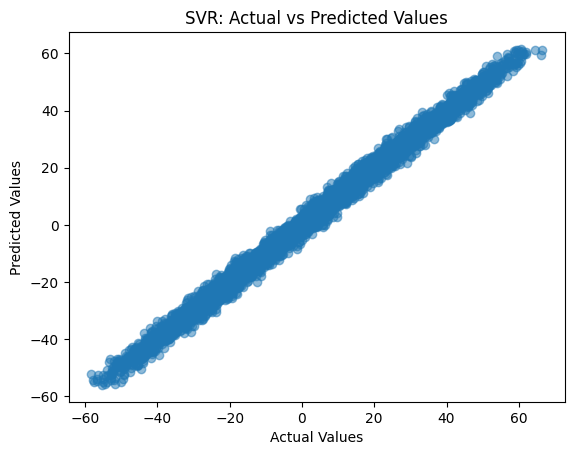

In [5]:

# Scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted Values')
plt.show()
